## CUSTOMER SEGMENTATION - MACHINE LEARNING - K- MEANS CLUSTERING

In [160]:
import warnings
warnings.filterwarnings("ignore")

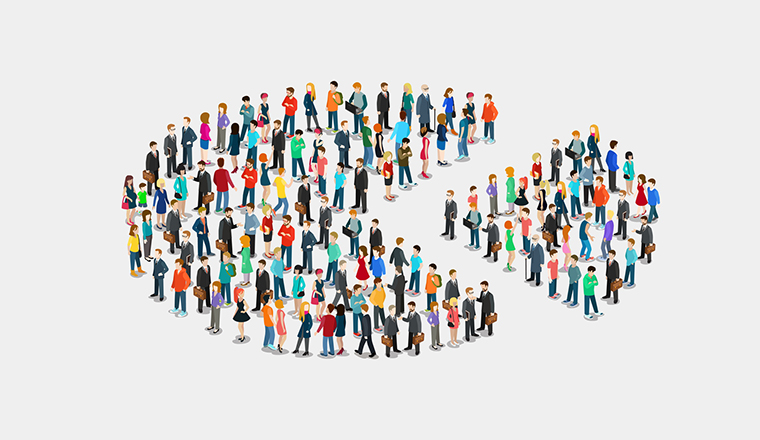

In [2]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Reading Dataset
df = pd.read_csv("customer_segmentation.csv")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [14]:
df.shape

(2240, 29)

In [12]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
# Checking Null Values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [20]:
df.isna().sum().sum()

24

In [22]:
df.dropna(inplace = True)

In [24]:
df.isna().sum().sum()

0

In [26]:
# Getting statistical information
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2216.000000  ...        2216.000000   2216.000000   2216.000000   
mean         37.637635  ...           5.319043      0.073556      0.074007   
std          54.752082  ...           2.425359      0.261106      0.261842   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2216.000000   2216.000000   2216.000000  2216.000000         2216.0   
mean       0.073105      0.064079      0.013538     0.009477            3.0   
std        0.260367      0.244950      0.115588     0.096907            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2216.0  2216.000000  
mean        11.0     0.150271  
std          0.0     0.357417  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [69]:
# Unique values for categorical columns
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [32]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

## DATA CLEANING AND FEATURE ENGINEERING

In [35]:
# Converting Date Columns
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [39]:
# Create New Column "Age"
df["Age"] = 2025 - df["Year_Birth"]

In [41]:
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [43]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   68  
1         11         0   71  
2         11         0   60  
3         11         0   41  
4         11         0   44  

[5 rows x 30 columns]

In [47]:
#  Create New Column "Total_Children"
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [51]:
df["Total_Children"].value_counts()

Total_Children
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

In [53]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [55]:
# No column for spendings --- Create New Column for Spending 
spend_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [57]:
df["Total_Spending"] = df[spend_cols].sum(axis = 1)

In [61]:
df[["Total_Spending"]]

Total_Spending
0               1617
1                 27
2                776
3                 53
4                422
...              ...
2235            1341
2236             444
2237            1241
2238             843
2239             172

[2216 rows x 1 columns]

In [65]:
# Getting Customer Tenure
df["Customer_Since"] = (pd.Timestamp("today") - df["Dt_Customer"]).dt.days

In [71]:
df["Customer_Since"]

0       4704
1       4154
2       4353
3       4180
4       4202
        ... 
2235    4422
2236    4060
2237    4196
2238    4197
2239    4663
Name: Customer_Since, Length: 2216, dtype: int64

## EXPLORATORY DATA ANALYSIS - EDA

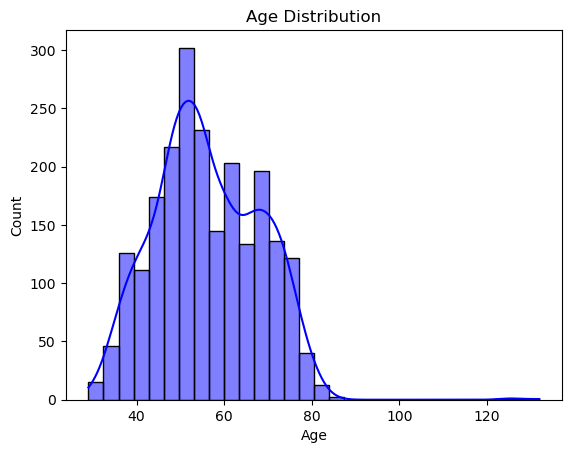

In [78]:
# Age Distribution
sns.histplot(df["Age"], bins = 30, kde = True , color ="blue")
plt.title("Age Distribution")
plt.show()

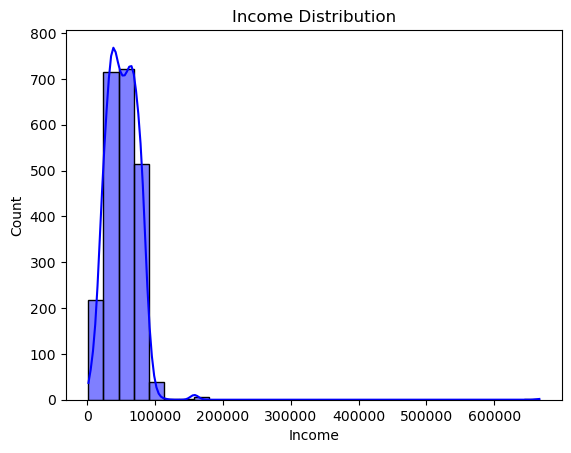

In [84]:
# Income Distribution
sns.histplot(df["Income"], bins = 30, kde = True , color ="blue")
plt.title("Income Distribution")
plt.show()

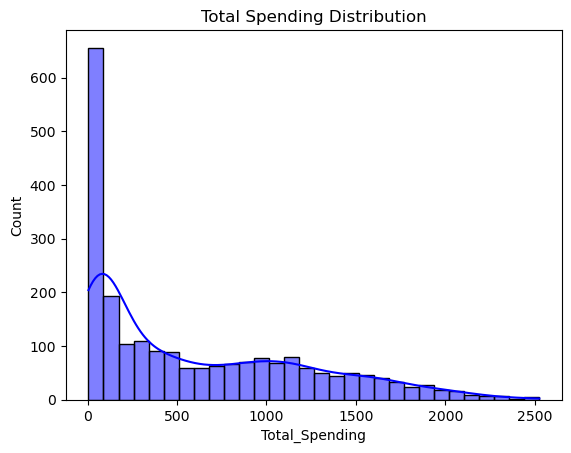

In [86]:
# Spending Distribution
sns.histplot(df["Total_Spending"], bins = 30, kde = True , color ="blue")
plt.title("Total Spending Distribution")
plt.show()

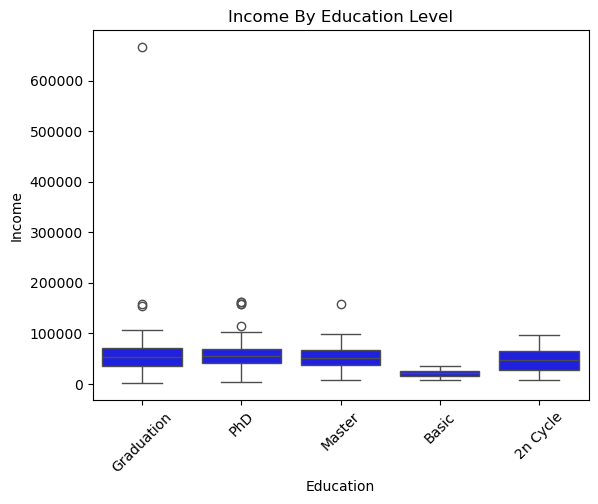

In [90]:
# Categorical Analysis -- Boxplot
sns.boxplot(x = "Education", y = "Income", data = df, color = "blue")
plt.xticks(rotation = 45)
plt.title("Income By Education Level")
plt.show()

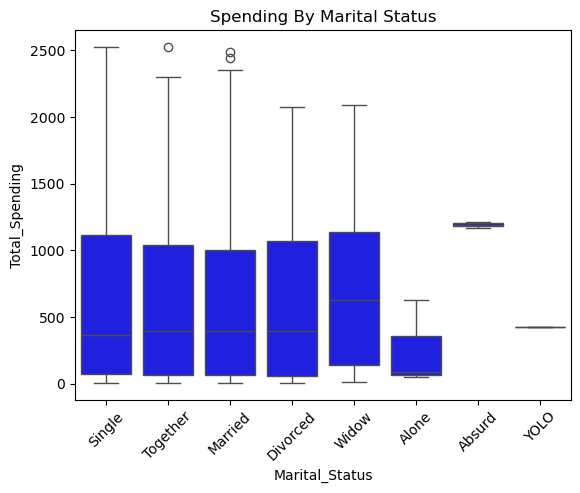

In [120]:
sns.boxplot(x = "Marital_Status", y = "Total_Spending", data = df, color = "blue")
plt.xticks(rotation = 45)
plt.title("Spending By Marital Status")
plt.show()

In [94]:
# Correlation Analysis
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [102]:
corr = df[["Income","Age","Recency","Total_Spending","NumWebPurchases","NumStorePurchases"]].corr()
corr

Income       Age   Recency  Total_Spending  \
Income             1.000000  0.161791 -0.003970        0.667576   
Age                0.161791  1.000000  0.016295        0.113487   
Recency           -0.003970  0.016295  1.000000        0.020066   
Total_Spending     0.667576  0.113487  0.020066        1.000000   
NumWebPurchases    0.387878  0.153051 -0.005641        0.528973   
NumStorePurchases  0.529362  0.127891 -0.000434        0.675181   

                   NumWebPurchases  NumStorePurchases  
Income                    0.387878           0.529362  
Age                       0.153051           0.127891  
Recency                  -0.005641          -0.000434  
Total_Spending            0.528973           0.675181  
NumWebPurchases           1.000000           0.516240  
NumStorePurchases         0.516240           1.000000

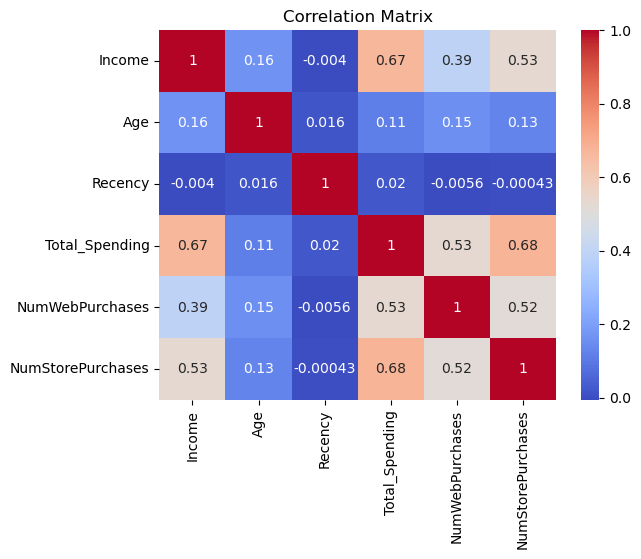

In [104]:
sns.heatmap(corr,annot = True, cmap ="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [106]:
# Pivot Table
pivot_income = df.pivot_table(values = "Income", index = "Education",columns = "Marital_Status",aggfunc = "mean")
pivot_income

Marital_Status   Absurd    Alone      Divorced       Married        Single  \
Education                                                                    
2n Cycle            NaN      NaN  49395.130435  46201.100000  53673.944444   
Basic               NaN      NaN   9548.000000  21960.500000  18238.666667   
Graduation      79244.0  34176.0  54526.042017  50800.258741  51322.182927   
Master          65487.0  61331.0  50331.945946  53286.028986  53530.560000   
PhD                 NaN  35860.0  53096.615385  58138.031579  53314.614583   

Marital_Status      Together         Widow     YOLO  
Education                                            
2n Cycle        44736.410714  51392.200000      NaN  
Basic           21240.071429  22123.000000      NaN  
Graduation      55758.480702  54976.657143      NaN  
Master          52109.009804  58401.545455      NaN  
PhD             56041.422414  60288.083333  48432.0

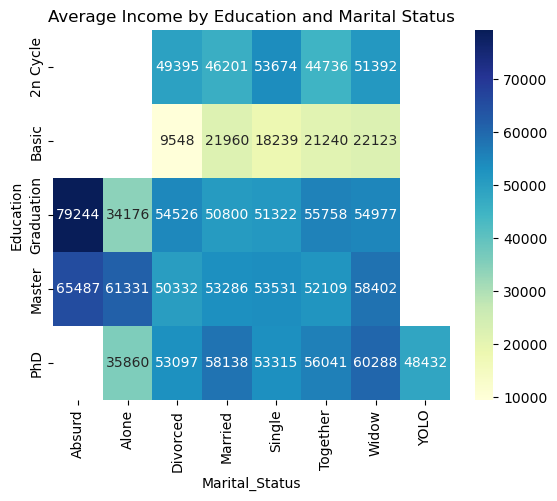

In [114]:
sns.heatmap(pivot_income, annot = True, fmt =".0f",cmap = "YlGnBu")
plt.title("Average Income by Education and Marital Status")
plt.show()

In [116]:
# Average Spending By Education
group1 = df.groupby("Education")["Total_Spending"].mean().sort_values(ascending = False)
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

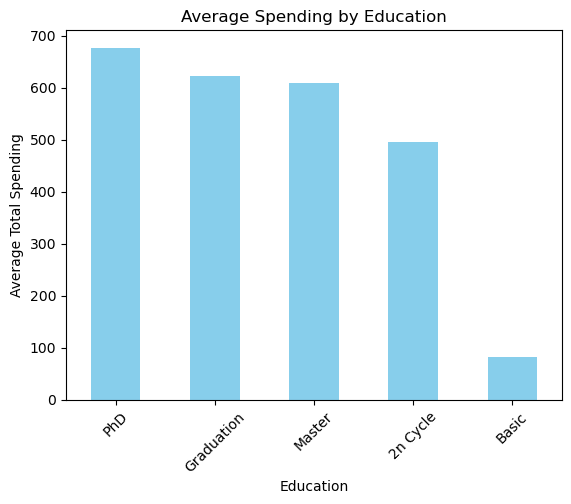

In [118]:
# Plot Using Bar Graph
group1.plot(kind = "bar", color = "skyblue")
plt.title("Average Spending by Education")
plt.xticks(rotation = 45)
plt.ylabel("Average Total Spending")
plt.show()

In [122]:
# Compaign Acceptance Rate By Marital Status
df["AcceptedAny"] = df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis = 1)

In [124]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [126]:
df["AcceptedAny"] = df["AcceptedAny"].apply(lambda x: 1 if x > 0 else 0)

In [128]:
df["AcceptedAny"].unique()

array([1, 0], dtype=int64)

In [132]:
group2 = df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending = False)
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

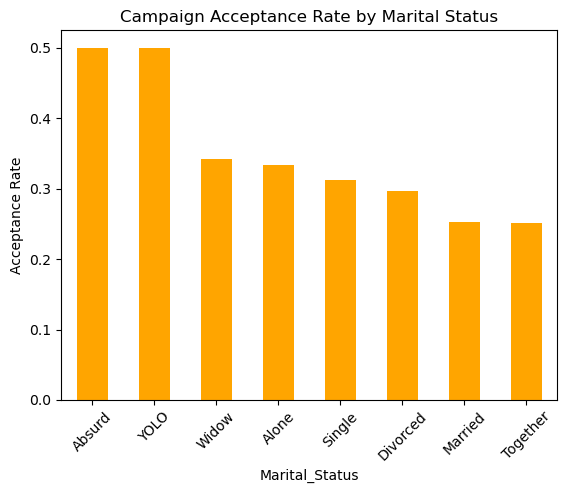

In [135]:
# Plot Using Bar Graph
group2.plot(kind = "bar", color = "orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.xticks(rotation = 45)
plt.ylabel("Acceptance Rate")
plt.show()

In [ ]:
# Average Income By Age Groups

In [137]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [139]:
labels = ["18-29","30-39","40-49","50-59","60-69","70+"]

In [143]:
df["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels = labels)

In [145]:
df[["AgeGroup"]]

AgeGroup
0       60-69
1         70+
2       50-59
3       40-49
4       40-49
...       ...
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+

[2216 rows x 1 columns]

In [162]:
group3 = df.groupby("AgeGroup")["Income"].mean()
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

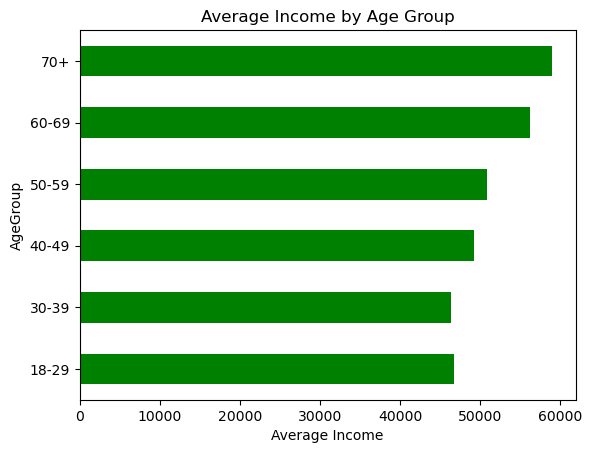

In [153]:
group3.plot(kind = "barh", color = "green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.show()

## CUSTOMER SEGMENTATION -- K - MEANS CLUSTERING

In [156]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   

   Response  Age  Total_Children  Total_Spending  Customer_Since  AcceptedAny  \
0         1   68               0            1617            4704            1   
1         0   71               2              27            4154            0   
2         0   60               0             776            4353            0   
3         0   41               1              53            4180            0   
4         0   44               1             422            4202            0   

   AgeGroup  
0     60-69  
1       70+  
2     50-59  
3     40-49  
4     40-49  

[5 rows x 35 columns]

In [158]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

## FILTER DATAFRAME

In [164]:
# Filter DataFrame
features = ["Age","Income","Total_Spending","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","Recency"]

In [166]:
X = df[features].copy()

In [168]:
X

Age   Income  Total_Spending  NumWebPurchases  NumStorePurchases  \
0      68  58138.0            1617                8                  4   
1      71  46344.0              27                1                  2   
2      60  71613.0             776                8                 10   
3      41  26646.0              53                2                  4   
4      44  58293.0             422                5                  6   
...   ...      ...             ...              ...                ...   
2235   58  61223.0            1341                9                  4   
2236   79  64014.0             444                8                  5   
2237   44  56981.0            1241                2                 13   
2238   69  69245.0             843                6                 10   
2239   71  52869.0             172                3                  4   

      NumWebVisitsMonth  Recency  
0                     7       58  
1                     5       38  
2                     4       26  
3                     6       26  
4                     5       94  
...                 ...      ...  
2235                  5       46  
2236                  7       56  
2237                  6       91  
2238                  3        8  
2239                  7       40  

[2216 rows x 7 columns]

### PREPROCESSING - STANDARD SCALER

In [170]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [172]:
X_scaled = scaler.fit_transform(X)

In [174]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

### ELBOW METHOD --> OPTIMUM NUMBER OF CLUSTERS (K)

In [181]:
from sklearn.cluster import KMeans

In [183]:
wcss = []

In [185]:
for i in range(2,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [187]:
wcss

[10218.620143748785,
 9007.783808892227,
 8158.801654022354,
 7635.8013086716455,
 7094.525137581482,
 6649.87204376684,
 6488.384158233037,
 5917.566153633608]

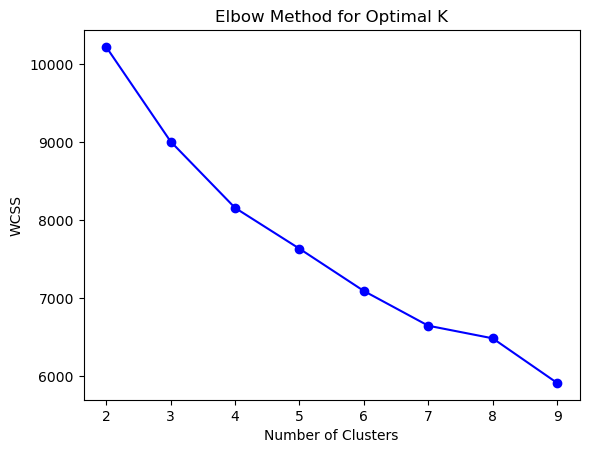

In [191]:
plt.plot(range(2,10),wcss,marker = "o", color = "blue")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [193]:
kmeans = KMeans(n_clusters = 6)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [195]:
df[["Cluster"]]

Cluster
0           0
1           1
2           0
3           1
4           5
...       ...
2235        0
2236        4
2237        2
2238        4
2239        4

[2216 rows x 1 columns]

In [198]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup', 'Cluster'],
      dtype='object')

## CLUSTER SUMMARY

In [208]:
cluster_summary = df.groupby("Cluster")[features].mean()

In [210]:
cluster_summary

Age         Income  Total_Spending  NumWebPurchases  \
Cluster                                                              
0        58.244898   63329.137026     1049.440233         8.072886   
1        50.479769   31705.558767       83.766859         1.901734   
2        56.563089   77158.222222     1308.757062         4.340866   
3        48.000000  666666.000000       62.000000         3.000000   
4        63.607477   54615.074766      565.317757         5.585670   
5        55.520958   36793.830339      130.473054         2.387226   

         NumStorePurchases  NumWebVisitsMonth    Recency  
Cluster                                                   
0                 8.918367           5.862974  61.244898  
1                 3.000000           6.657033  27.138728  
2                 8.378531           2.297552  50.126177  
3                 3.000000           6.000000  23.000000  
4                 6.401869           5.956386  26.277259  
5                 3.457086           6.353293  76.736527

In [212]:
df["Cluster"].value_counts()

Cluster
2    531
1    519
5    501
0    343
4    321
3      1
Name: count, dtype: int64

In [214]:
# Visualise Cluster by PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X_scaled)
df["PCA1"],df["PCA2"] = pca_data[:,0],pca_data[:,1]

In [216]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]])

In [218]:
df[["PCA1"]]

PCA1
0     1.107519
1    -1.336734
2     1.882277
3    -1.784359
4     0.020363
...        ...
2235  1.248177
2236  0.508708
2237  1.153597
2238  1.887680
2239 -0.841821

[2216 rows x 1 columns]

In [220]:
df[["PCA2"]]

PCA2
0    -0.211760
1     0.269839
2    -1.014161
3    -0.704928
4     1.235265
...        ...
2235 -0.535766
2236 -0.141328
2237  1.150570
2238 -1.160737
2239 -0.159636

[2216 rows x 1 columns]

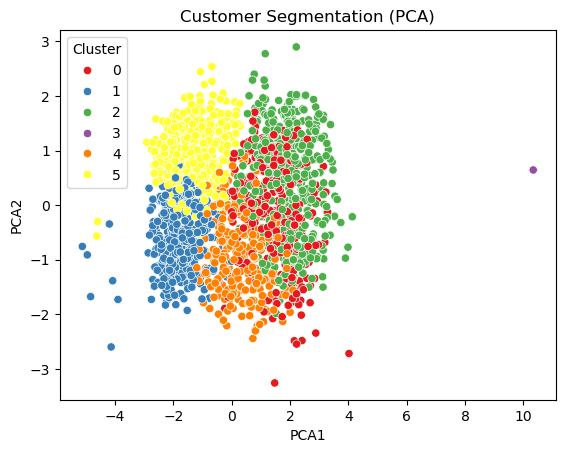

In [222]:
sns.scatterplot(x = "PCA1", y = "PCA2", hue = "Cluster",data = df, palette = "Set1")
plt.title("Customer Segmentation (PCA)")
plt.show()

In [224]:
cluster_summary

Age         Income  Total_Spending  NumWebPurchases  \
Cluster                                                              
0        58.244898   63329.137026     1049.440233         8.072886   
1        50.479769   31705.558767       83.766859         1.901734   
2        56.563089   77158.222222     1308.757062         4.340866   
3        48.000000  666666.000000       62.000000         3.000000   
4        63.607477   54615.074766      565.317757         5.585670   
5        55.520958   36793.830339      130.473054         2.387226   

         NumStorePurchases  NumWebVisitsMonth    Recency  
Cluster                                                   
0                 8.918367           5.862974  61.244898  
1                 3.000000           6.657033  27.138728  
2                 8.378531           2.297552  50.126177  
3                 3.000000           6.000000  23.000000  
4                 6.401869           5.956386  26.277259  
5                 3.457086           6.353293  76.736527

In [226]:
# Export the Model
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']